In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
x = df.drop(columns=['price_range'])
print(x)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [5]:
y = df['price_range']
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


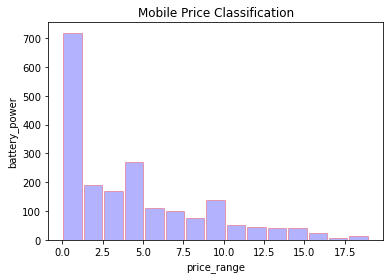

In [6]:
#plotting histogram 
import matplotlib.pyplot as plt
plt.hist(df['fc'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 
#x and y-axis labels 
plt.xlabel('price_range') 
plt.ylabel('battery_power') 
#plot title 
plt.title('Mobile Price Classification') 
plt.show();

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


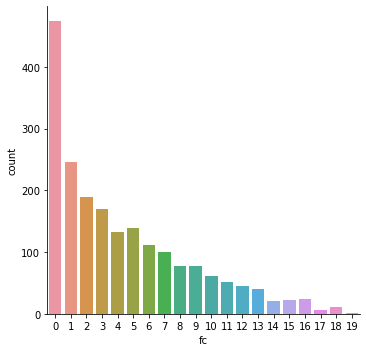

In [7]:
import seaborn as sns
sns.factorplot('fc',data=df,kind='count')

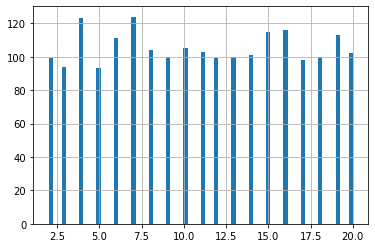

In [8]:
df['talk_time'].hist(bins=70)

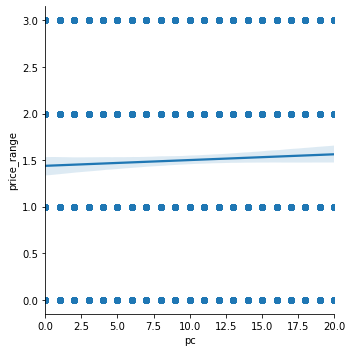

In [9]:
sns.lmplot('pc','price_range',data=df)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [12]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [13]:
y_pred = nb.predict(x_test)
print(y_pred)

print(accuracy_score(y_test, y_pred))


[3 0 1 0 2 1 3 1 3 3 3 3 1 0 2 0 1 3 2 1 3 0 2 2 3 0 0 0 3 0 1 3 3 2 1 3 0
 3 3 3 1 3 0 1 1 1 1 3 2 3 3 1 1 1 0 0 3 3 3 0 0 0 2 1 1 1 3 2 2 0 0 0 0 2
 0 2 2 1 1 3 0 0 3 1 1 3 1 1 1 0 2 0 2 1 3 1 0 1 2 3 2 2 2 2 1 3 2 3 2 0 1
 2 2 3 3 1 2 1 1 3 3 3 2 0 3 3 3 1 0 0 3 2 1 0 2 2 0 2 3 0 3 1 1 1 2 1 3 3
 2 2 2 1 3 0 1 0 2 0 0 1 2 0 2 2 3 0 1 1 3 3 0 2 0 2 0 0 1 3 2 2 2 2 2 0 0
 3 2 3 2 2 0 3 0 2 0 2 1 3 3 0 0 0 2 1 3 3 2 3 2 3 2 2 0 1 2 2 0 1 0 2 1 2
 0 1 0 3 1 3 1 0 0 1 0 3 0 0 0 2 1 0 3 3 1 2 2 1 3 0 2 0 0 0 0 2 0 3 1 3 1
 2 1 3 1 0 2 0 3 1 0 0 1 1 1 0 3 2 1 2 1 0 3 1 2 0 2 1 3 3 3 2 3 3 3 2 3 3
 3 2 2 0 2 0 1 2 3 3 3 1 3 2 0 1 2 1 2 1 1 1 1 2 3 0 3 1 2 2 0 3 3 2 3 0 1
 2 0 2 3 3 1 3 1 0 0 3 2 0 3 3 0 3 2 0 0 2 0 1 2 2 0 1 0 3 0 1 2 3 3 1 2 0
 1 3 3 1 2 3 0 0 0 3 3 0 3 0 0 2 2 2 2 2 0 0 0 1 3 3 0 2 2 0]
0.815


In [14]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
# predictions
rfc_predict = rfc.predict(x_test)

print("Accuracy:",accuracy_score(y_test, rfc_predict))

Accuracy: 0.875


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)


print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.835


In [17]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [18]:
y_pred= classifier.predict(x_test)  

In [19]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [20]:
print(accuracy_score(y_test, y_pred))

0.945
